## Customer Churn Prediction

In [75]:
# conda install -c districtdatalabs yellowbrick

In [76]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report,confusion_matrix,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Building Models

In [77]:
df = pd.read_csv("telco_clean_20201215.csv")
df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,5.463515,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,43.468379,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,10.399519,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,42.903963,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,12.314625,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [78]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [79]:
print("Percentage of Churned Customer:%",
      round(df.Churn.mean(),2))

Percentage of Churned Customer:% 0.27


> **Target variable is a bit of imbalanced. We should resample the data.**

## Splitting Data

In [80]:
X=df.drop('Churn',axis=1)
y=df.Churn

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42) # stratify=y

In [82]:
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

### SMOTE

In [83]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_sample(X_train, y_train)
y_smote.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

### ADASYN

In [84]:
ad = ADASYN(random_state=42)
X_adasyn, y_adasyn = ad.fit_sample(X_train, y_train)
y_adasyn.value_counts()

1    4187
0    4138
Name: Churn, dtype: int64

In [85]:
# SMOTE
X_train, y_train = X_smote, y_smote

# ADASYN
# X_train, y_train = X_adasyn, y_adasyn

# ``1.XGBoost Classifer``

In [86]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

[02:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_pred = xgb.predict(X_test)

### **Evaluate the performance**

In [88]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[872 164]
[139 234]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.59      0.63      0.61       373

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409



In [89]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.7849538679914834 
xgb_f1_score: 0.7871271701036096 
xgb_recall: 0.7849538679914834


### **Tunning XGBOOST**

In [90]:
xgb = XGBClassifier()

In [91]:
xgb_params = {"n_estimators": [50,500,1000],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [92]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [93]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [94]:
# xgb_grid.best_params_

In [95]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 520, 
                                subsample= 0.15).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

[02:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [96]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[803 233]
[ 79 294]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.56      0.79      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.75      1409
weighted avg       0.82      0.78      0.79      1409



In [97]:
xgb_f1_true=float(classification_report(y_test, y_pred).split()[12])
xgb_f1_true

0.65

In [98]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.7785663591199432 
xgb_f1_score: 0.788621565569963 
xgb_recall: 0.7785663591199432


**`Cross Validation Scores`**

In [99]:
# xgb_accuracy = cross_val_score(xgb_tuned, X_test, y_test,cv = 10).mean()
# xgb_f1_score = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# xgb_recall = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

### Visualization of Confusion Matrix with Table

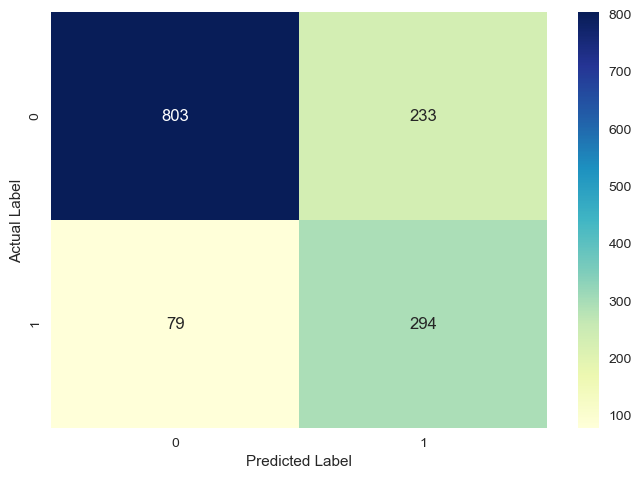

In [100]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# ``2.Random Forest Classifier``

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
y_pred = rf_model.predict(X_test)

### **Evaluate the performance**

In [103]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[874 162]
[155 218]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.57      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [104]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.7750177430801988 
rfc_f1_score: 0.7756821514829241 
rfc_recall: 0.7750177430801988


**`Cross Validation Scores`**

In [105]:
# rfc_accuracy = cross_val_score(rf_model, X_test, y_test,cv = 10).mean()
# rfc_f1_score = cross_val_score(rf_model, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# rfc_recall = cross_val_score(rf_model, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

### **RF Tunning**

In [106]:
rfc_params = {"n_estimators":[300,500,1000],
              "max_depth":[7,10,15],
              "max_features": [8,10,15],
              "min_samples_split": [4,6,8]}

In [107]:
# rfc_grid = GridSearchCV(rf_model, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [108]:
# rfc_grid= RandomizedSearchCV(rf_model, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train_tf_idf, y_train)

In [109]:
# rfc_grid.best_params_

In [110]:
rfc_tuned = RandomForestClassifier(max_depth = 10,             
                                  max_features = 10, 
                                  min_samples_split = 4, 
                                  n_estimators = 500).fit(X_train, y_train)

In [111]:
y_pred = rfc_tuned.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[832 204]
[101 272]
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1036
           1       0.57      0.73      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



In [112]:
rf_f1_true=float(classification_report(y_test, y_pred).split()[12])
rf_f1_true

0.64

### **Visualization of Confusion Matrix with Table**

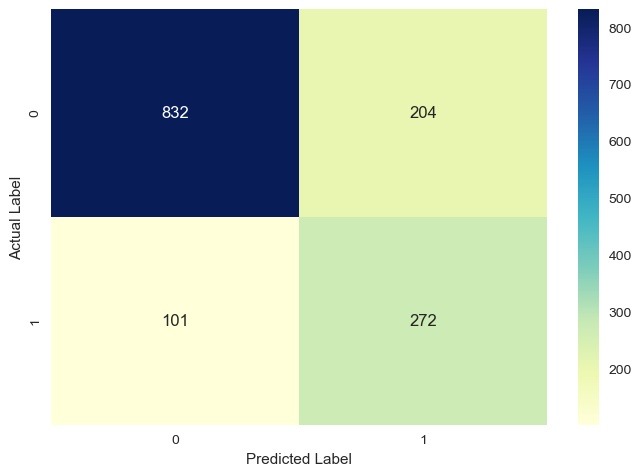

In [113]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# ``3.KNeighborsClassifer``

### Scaling

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [117]:
y_pred = knn.predict(X_test)

### **Visualize Accuracies of Train & Test Data by Different k`s**

In [118]:
neighbors = range(2,8,2) # k nin tek sayi olmasi beklenir.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

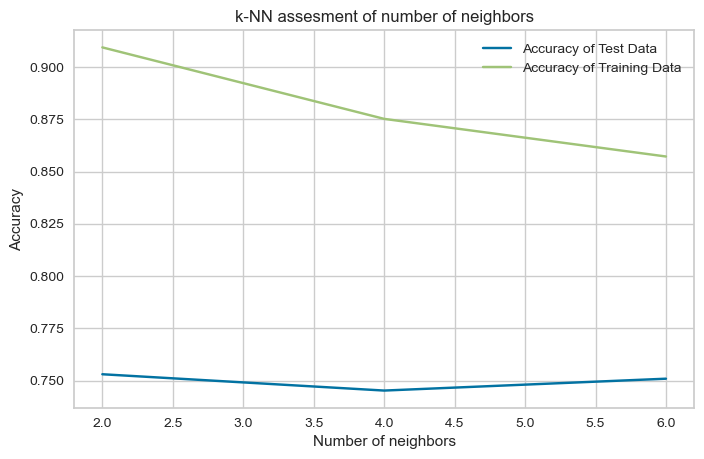

In [119]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### **Find Optimum K Value with Elbow Method**

In [120]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# k nin tek sayi olmasi beklenir.
# Will take some time
for i in range(1,8,2):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

print('Optimum K_Value: ',error_rate.index(min(error_rate)))

Optimum K_Value:  2


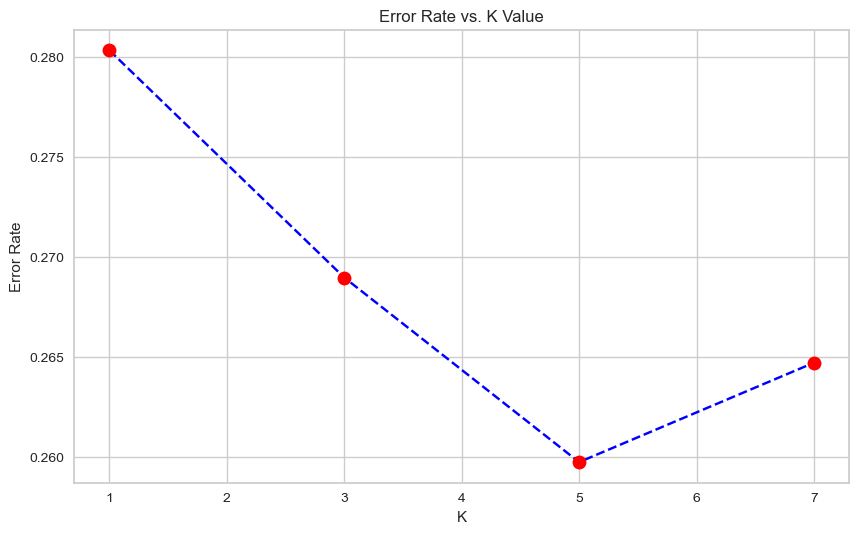

In [121]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8,2),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

### Tunning KNN with GridSearchCV

In [122]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": range(2,18,2)} # k tek sayi olmali

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [123]:
knn_cv_model.best_params_

{'n_neighbors': 10}

In [124]:
knn_tuned= KNeighborsClassifier(n_neighbors = 33).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

### **Evaluate the Performance**

In [125]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[733 303]
[ 67 306]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



In [126]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

knn_accuracy: 0.7374024130589071 
knn_f1_score: 0.7520797222891182 
knn_recall: 0.7374024130589071


In [127]:
knn_f1_true=float(classification_report(y_test, y_pred).split()[12])
knn_f1_true

0.62

### Visualization of Confusion Matrix with Table

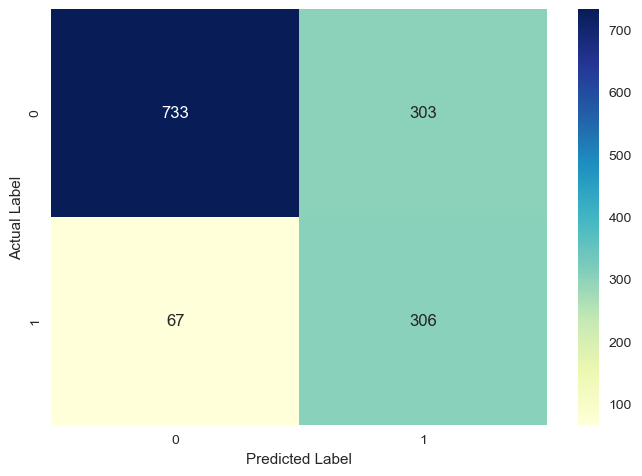

In [128]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# `4-Logistic Regression`

In [129]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_pred=model.predict(X_test)

### **Evaluate the performance**

In [131]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[852 184]
[114 259]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1036
           1       0.58      0.69      0.63       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



In [132]:
log_accuracy = accuracy_score(y_test, y_pred)
log_f1_score = f1_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
print('log_accuracy:',log_accuracy,
      '\nlog_f1_score:',log_f1_score,
      '\nlog_recall:',log_recall)

log_accuracy: 0.7885024840312278 
log_f1_score: 0.7938765596418083 
log_recall: 0.7885024840312278


In [133]:
log_f1_true=float(classification_report(y_test, y_pred).split()[12])
log_f1_true

0.63

### `Compare Models Accuracies & F1 Scores & Recall`

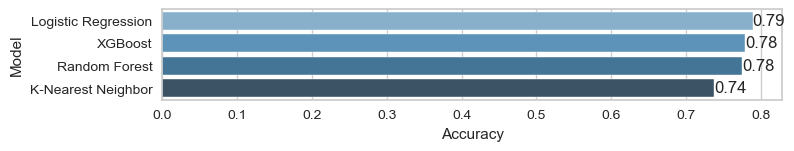

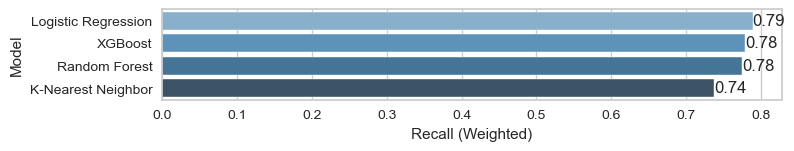

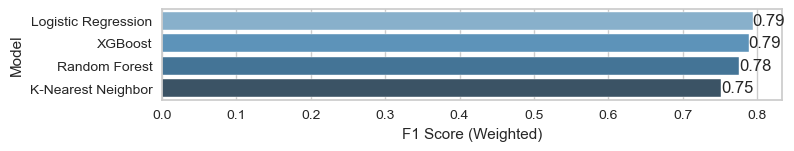

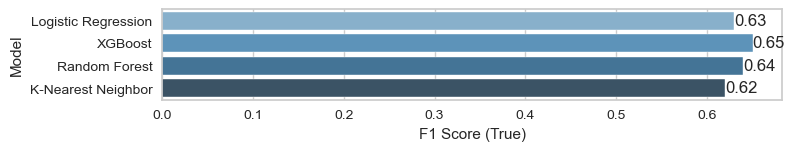

In [134]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Logistic Regression","K-Nearest Neighbor"],
                        "Accuracy": [rfc_accuracy, xgb_accuracy, log_accuracy,knn_accuracy],
                        "F1 Score": [rfc_f1_score, xgb_f1_score, log_f1_score, knn_f1_score],
                        "Recall": [rfc_recall, xgb_recall, log_recall,knn_recall],
                        "F1 Score (True)": [rf_f1_true, xgb_f1_true, log_f1_true, knn_f1_true]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Recall (Weighted)')
plt.show()

plt.subplot(413)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('F1 Score (Weighted)')
plt.show()

plt.subplot(414)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score (True)", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Result
* F1 score is used in the case where we have skewed classes i.e one type of class examples more than the other type class examples.
* For Churn Analysis, `F1 score of True Class` is the most important parameter.
* As we can say, XGBoost and Random Forest Classifier with SMOTE algorithm are the best models when we looked at the `F1 score of True Class`

### Feature Importance for XGBoost

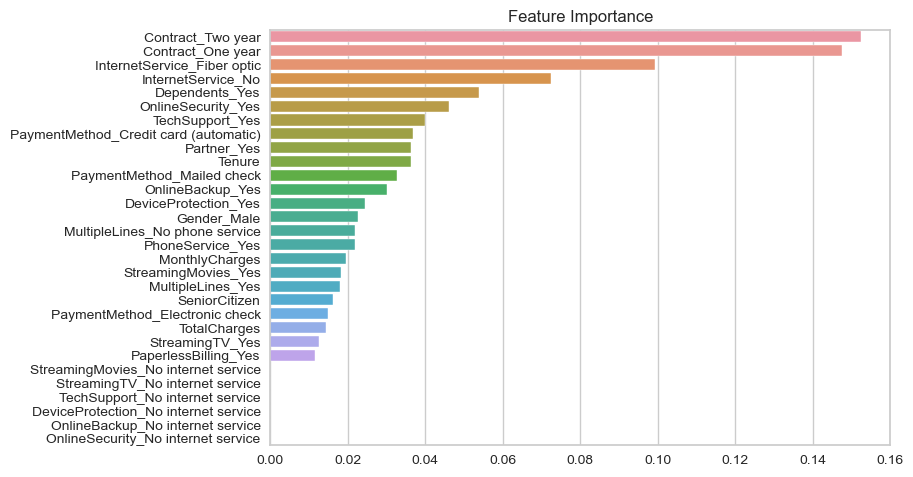

Contract_Two year                        0.152446
Contract_One year                        0.147547
InternetService_Fiber optic              0.099390
InternetService_No                       0.072385
Dependents_Yes                           0.053979
OnlineSecurity_Yes                       0.046085
TechSupport_Yes                          0.039856
PaymentMethod_Credit card (automatic)    0.036813
Partner_Yes                              0.036286
Tenure                                   0.036252
dtype: float32

In [135]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

### Feature Importance for Random Forest

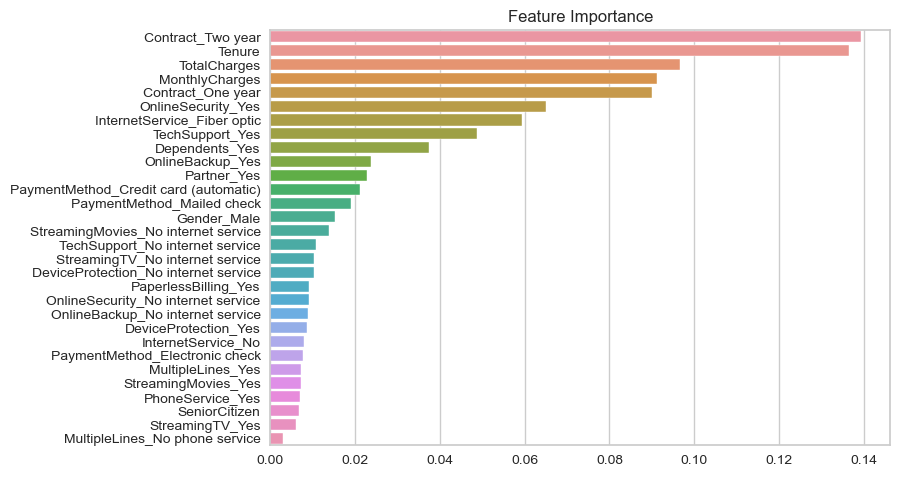

Contract_Two year              0.139286
Tenure                         0.136602
TotalCharges                   0.096688
MonthlyCharges                 0.091266
Contract_One year              0.089946
OnlineSecurity_Yes             0.065015
InternetService_Fiber optic    0.059430
TechSupport_Yes                0.048769
Dependents_Yes                 0.037410
OnlineBackup_Yes               0.023675
dtype: float64

In [136]:
feature_imp = pd.Series(rfc_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

### Saving Model

In [140]:
import pickle
pickle.dump(xgb_tuned,open("XGBoost.pkl","wb"))
xgb_tuned = pickle.load(open("XGBoost.pkl","rb"))

In [141]:
pickle.dump(rfc_tuned,open("RandomForest.pkl","wb"))
rfc_tuned = pickle.load(open("RandomForest.pkl","rb"))